# Introdução

## Ojetivo
  

<p>
A analise dos dados tem como objetivo analisar a base estatisticamente a base de dados do pense para responder as seguintes perguntas comportamentais:
 <li> Há diferença entre a idade de iniciação sexual entre os sexos? E entre escolas na capital e interior?
 <li> Há uma tendencia maior no consumo de bebidas alcoolicas entre os meninos? E será que no interior os estudantes bebem mais? 
    
 <li> Um iniciação sexual cedo( < 14 anos) tem relação com o uso cedo de drogas?
 <li> O consumo de cigarro está associado ao alcool e/ou outras drogas?

# Resumo

# Bibliotecas e Configurações

In [1]:
import pandas as pd
from  zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from IPython.core.display import display, HTML, Markdown
import numpy as np
from statsmodels.stats.weightstats import zconfint
from statsmodels.stats.weightstats import DescrStatsW
from statsmodels.stats.weightstats import ztest
from scipy.stats import normaltest
from scipy.stats import ranksums

In [2]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
display(HTML("<style>.container { width:99% !important; }</style>"))

# Importação dos dados

In [3]:
path = 'Dados desafio 3.zip'

In [4]:
zip= ZipFile(path)
dados = pd.read_csv(zip.open(zip.namelist()[1]), sep = ";", thousands=".", decimal=",")

# Funções

In [5]:
def tabela_frequencia(df,coluna,legenda):
    frequencia = df[coluna].value_counts()
    percentual = round(df[coluna].value_counts(normalize=True)*100,2)
    dist_frequ = pd.DataFrame({'Frequência': frequencia, 'Percentual': percentual})
    dist_frequ.rename_axis(legenda, axis = 1, inplace=True)
    return dist_frequ

In [6]:
def k_sturges(amostra):
    k=int(1+((10/3)*np.log10(len(amostra))))
    return k

In [76]:
def crosstab_rename(pergunta1, respostas1, pergunta2, respostas2,titulo):
    crosstab = pd.crosstab(pergunta1,pergunta2,normalize='columns').round(4)*100
    crosstab.rename(index= respostas1, inplace= True)
    crosstab.rename(columns = respostas2, inplace= True)
    crosstab.rename_axis('', axis = 1, inplace=True)
    crosstab.rename_axis(titulo, axis = 'index', inplace=True)
    return crosstab

def crosstab_rename_all(pergunta1, respostas1, pergunta2, respostas2,titulo):
    crosstab = pd.crosstab(pergunta1,pergunta2,normalize='all').round(4)*100
    crosstab.rename(index= respostas1, inplace= True)
    crosstab.rename(columns = respostas2, inplace= True)
    crosstab.rename_axis('', axis = 1, inplace=True)
    crosstab.rename_axis(titulo, axis = 'all', inplace=True)
    return crosstab

def crosstab_rename_index(pergunta1, respostas1, pergunta2, respostas2,titulo):
    crosstab = pd.crosstab(pergunta1,pergunta2,normalize='index').round(4)*100
    crosstab.rename(index= respostas1, inplace= True)
    crosstab.rename(columns = respostas2, inplace= True)
    crosstab.rename_axis('', axis = 1, inplace=True)
    crosstab.rename_axis(titulo, axis = 'index', inplace=True)
    return crosstab

In [43]:
def histplot_segregado(df,pergunta,hue,legenda,legendax,dicionario_legenda):
    df[hue]=df[hue].map(dicionario_legenda)
    ax = sns.histplot(data=df,x=pergunta,color='blue',hue=hue,bins=len(df[df[pergunta]!=99][df[pergunta]!=-1][pergunta].unique()),palette='YlOrRd',stat='probability',cumulative=True)
    ax.figure.set_size_inches(14,8)
    ax.set_title(legenda)
    ax.set_xlabel(legendax)
    plt.xticks(df[df[pergunta]!=99][df[pergunta]!=-1][pergunta].unique())
    plt.show()

In [9]:
def histplot_segregado_(df,pergunta,hue,legenda,legendax,dicionario_legenda):
    df[hue]=df[hue].map(dicionario_legenda)
    ax = sns.histplot(data=df,x=pergunta,color='blue',hue=hue,bins=len(df[df[pergunta]!=99][df[pergunta]!=-1][pergunta].unique()),
                      palette='YlOrRd',stat="probability")
    ax.figure.set_size_inches(14,8)
    ax.set_title(legenda)
    ax.set_xlabel(legendax)
    plt.xticks(df[df[pergunta]!=99][df[pergunta]!=-1][pergunta].unique())
    plt.show()

### Dicionários:

In [90]:
idade_iniciacao_sexual= {
9:'9 anos ou menos',
10:'10 anos',
11:'11 anos',
12:'12 anos',
13:'13 anos',
14:'14 anos',
15:'15 anos',
16:'16 anos',
17:'17 anos',
18:'18 anos ou mais'    
}

tipo_municipio={
1:'Capital',
2:'Interior'
}

sexo={
1:'Masculino',
2:'Feminino'
}

consumo_30_dias ={
1:"Nenhum dia nos últimos 30 dias",
2:"1 ou 2 dias nos últimos 30 dias",
3:"3 a 5 dias nos últimos 30 dias",
4:"6 a 9 dias nos últimos 30 dias",
5:"10 a 19 dias nos últimos 30 dias",
6:"20 a 29 dias nos últimos 30 dias",
7:"Todos os dias nos últimos 30 dias" 
}

idade_consumo_drogas= {
-1:'Pulo no questionário',
7:'7 anos ou menos',
8:'8 anos',
9:'9 anos',
10:'10 anos',
11:'11 anos',
12:'12 anos',
13:'13 anos',
14:'14 anos',
15:'15 anos',
16:'16 anos',
17:'17 anos',
18:'18 anos ou mais',
99:'Não informado'
}

## Exploração inicial dos dados

In [11]:
dados

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,...,VB16001A05,VB16001A06,VB16001A07,VB16001A08,ESTRATO_EXP,ESTRATOGEOREG,PESO,aluno,escola,turma
0,2015,76,1,11,1100205,1,1,2,1,14,...,2,2,2,2,110020521,1100205,3.738463,1,1,1787
1,2015,76,1,11,1100205,1,1,1,4,16,...,2,2,2,2,110020521,1100205,3.738463,2,1,1787
2,2015,76,1,11,1100205,1,1,1,1,13,...,2,2,2,2,110020521,1100205,3.738463,3,1,1787
3,2015,76,1,11,1100205,1,1,1,4,14,...,1,2,2,2,110020521,1100205,3.738463,4,1,1787
4,2015,76,1,11,1100205,1,1,1,1,14,...,2,1,2,2,110020521,1100205,3.738463,5,1,1787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,2015,76,5,53,5300108,1,1,2,1,14,...,2,2,1,2,530010821,5300108,16.873376,102068,3040,1883
102068,2015,76,5,53,5300108,1,1,2,4,14,...,2,2,1,2,530010821,5300108,16.873376,102069,3040,1883
102069,2015,76,5,53,5300108,1,1,2,4,14,...,1,2,2,2,530010821,5300108,16.873376,102070,3040,1883
102070,2015,76,5,53,5300108,1,1,1,4,15,...,1,2,2,2,530010821,5300108,16.873376,102071,3040,1883


In [12]:
dados.select_dtypes(include='object')

""
0
1
2
3
4
...
102067
102068
102069
102070


In [13]:
round((dados.notna().sum()/(dados.notna().sum() + dados.isna().sum()))*100,2)

ANOPESQ          100.0
PAIS             100.0
REGEOGR          100.0
UFCENSO          100.0
MUNICIPIO_CAP    100.0
                 ...  
ESTRATOGEOREG    100.0
PESO             100.0
aluno            100.0
escola           100.0
turma            100.0
Length: 174, dtype: float64

## Exploração dos dados que serão utilizados

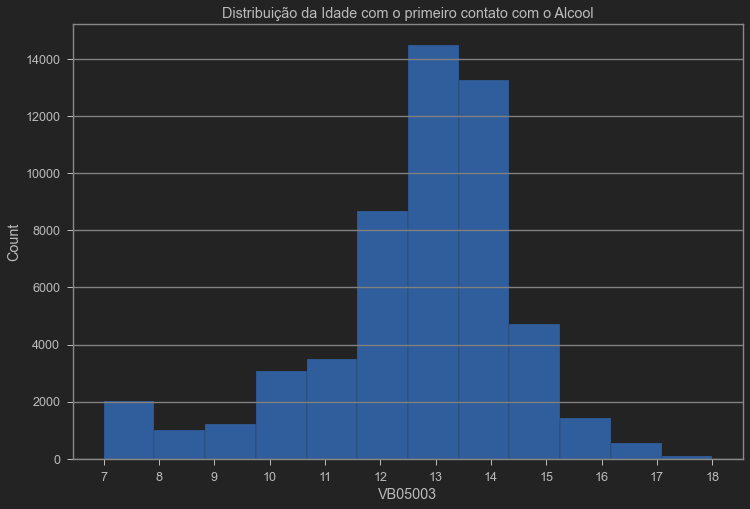

In [14]:
plt.figure(figsize=(12,8))
plt.title('Distribuição da Idade com o primeiro contato com o Alcool')
sns.histplot(dados['VB05003'][dados['VB05003']!=99][dados['VB05003']!=1],bins=12,kde=False,color='b')
plt.xticks(ticks=[7,8,9,10,11,12,13,14,15,16,17,18])
plt.grid(axis='y',c='grey')
plt.show()

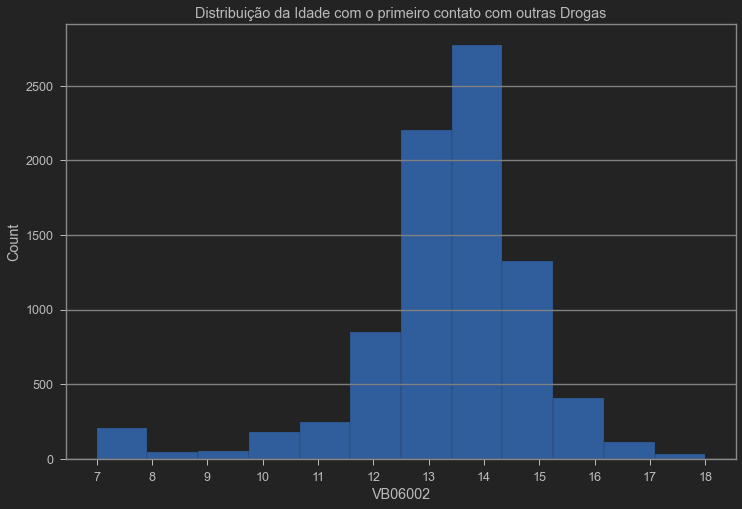

In [15]:
plt.figure(figsize=(12,8))
plt.title('Distribuição da Idade com o primeiro contato com outras Drogas')
sns.histplot(dados['VB06002'][dados['VB06002']!=99][dados['VB06002']!=-1],bins=12,kde=False,color='b')
plt.xticks(ticks=[7,8,9,10,11,12,13,14,15,16,17,18])
plt.grid(axis='y',c='grey')
plt.show()

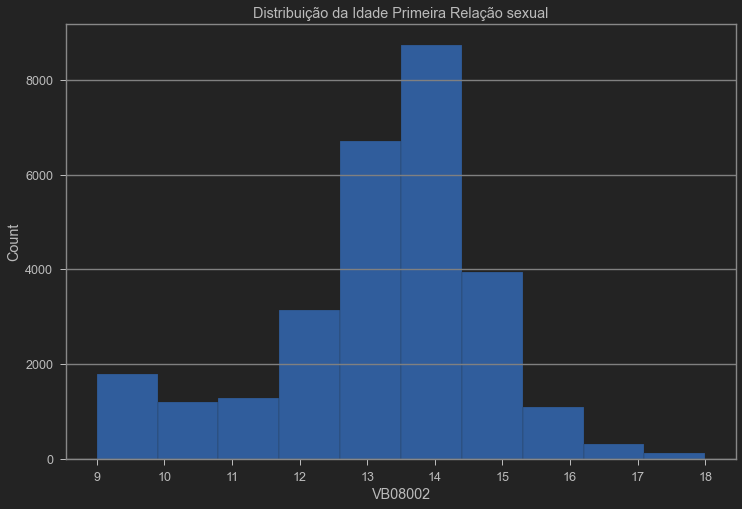

In [16]:
plt.figure(figsize=(12,8))
plt.title('Distribuição da Idade Primeira Relação sexual')
sns.histplot(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1],bins=10,kde=False,color='b')
plt.xticks(ticks=[9,10,11,12,13,14,15,16,17,18])
plt.grid(axis='y',c='grey')
plt.show()

In [17]:
tabela_frequencia(dados,'VB08002','Idade Primeira Relação sexual')

Idade Primeira Relação sexual,Frequência,Percentual
-1,73495,72.00
14,8748,8.57
13,6712,6.58
15,3935,3.86
12,3146,3.08
9,1783,1.75
11,1290,1.26
10,1190,1.17
16,1096,1.07
17,317,0.31


In [18]:
tabela_frequencia(dados,'VB01021','Série Atual')

Série Atual,Frequência,Percentual
4,100497,98.46
3,1247,1.22
5,124,0.12
7,50,0.05
1,43,0.04
6,39,0.04
2,37,0.04
99,35,0.03


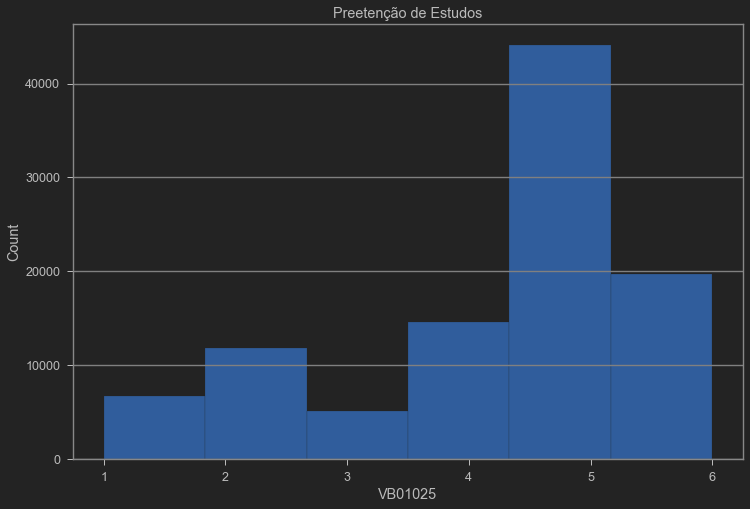

In [19]:
plt.figure(figsize=(12,8))
plt.title('Preetenção de Estudos')
sns.histplot(dados['VB01025'][dados['VB01025']!=99][dados['VB01025']!=-1],bins=6,kde=False,color='b')
plt.xticks(ticks=[1,2,3,4,5,6])
plt.grid(axis='y',c='grey')
plt.show()

In [20]:
tabela_frequencia(dados,'VB01025','Preetenção de Estudos')

Preetenção de Estudos,Frequência,Percentual
5,44167,43.27
6,19673,19.27
4,14536,14.24
2,11804,11.56
1,6706,6.57
3,5081,4.98
99,105,0.10


In [21]:
tabela_frequencia(dados,'VB04002','Primeiro Contato com cigarro')

Primeiro Contato com cigarro,Frequência,Percentual
-1,83349,81.66
13,4516,4.42
14,4147,4.06
12,2843,2.79
15,1597,1.56
11,1363,1.34
10,1203,1.18
7,1068,1.05
9,560,0.55
16,539,0.53


# Analise dos Dados

## Há diferença entre a idade de iniciação sexual entre os sexos? E entre escolas do interior e capital? 

A pergunta sobre iniciação sexual é a VB08002 porém a maior parte das pessoas pularam esta questão, 72% do total por isso as conclusões podem divergir da realidade. Para a análise só será considerado a população que respondeu a pergunta.

In [22]:
dados['VB08002'][dados['VB08002']!=-1][dados['VB08002']!=99]

1         12
5         10
7         12
12        14
15        16
          ..
102059    12
102062    15
102064    14
102070    14
102071    14
Name: VB08002, Length: 28346, dtype: int64

In [23]:
crosstab_rename(dados['VB08002'][dados['VB08002']!=-1][dados['VB08002']!=99],idade_iniciacao_sexual,dados['TIPO_MUNIC'],tipo_municipio, 'Idade da Primeira Relação Sexual:')

,Capital,Interior
Idade da Primeira Relação Sexual:,,
9 anos ou menos,6.56,6.04
10 anos,4.06,4.33
11 anos,4.45,4.65
12 anos,11.46,10.76
13 anos,24.59,22.82
14 anos,31.46,30.29
15 anos,13.23,14.49
16 anos,3.23,4.47
17 anos,0.68,1.53


C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


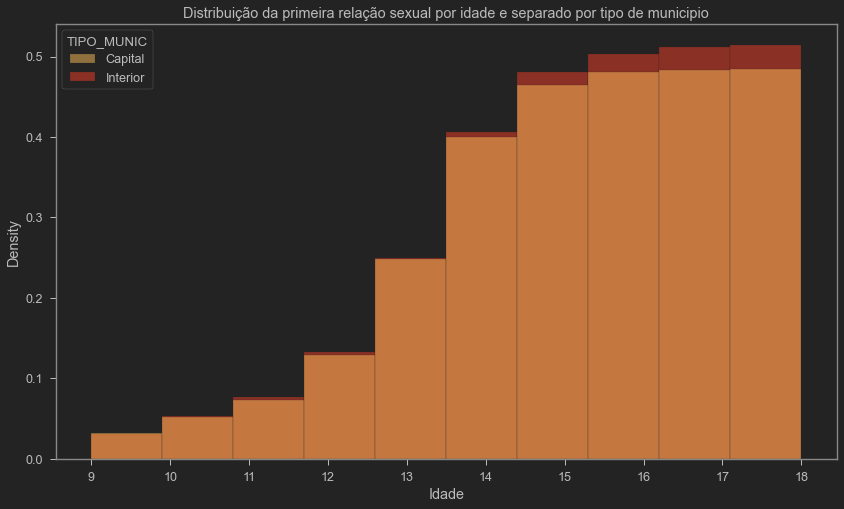

In [24]:
histplot_segregado(dados[dados['VB08002']!=99][dados['VB08002']!=-1],'VB08002','TIPO_MUNIC','Distribuição da primeira relação sexual por idade e separado por tipo de municipio','Idade',tipo_municipio)

In [25]:
print(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==1].describe()[:3])
print( dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==2].describe()[:3])

count    13752.000000
mean        13.129654
std          1.733117
Name: VB08002, dtype: float64
count    14594.000000
mean        13.247225
std          1.809203
Name: VB08002, dtype: float64


Visualmente não parece ter diferenças significativas entre a capital e o interior, porem, como temos uma grande amostra podemos usar o teste Z para confirmar nossa hipotese. Porem não sabemos se as amostras são distribuições normais. Entao vamos verificar a normalidade das amostras.

In [26]:
normaltest(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==1])

NormaltestResult(statistic=1116.3738897712049, pvalue=3.8237541887969135e-243)

In [27]:
normaltest(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==2])

NormaltestResult(statistic=805.6041314394138, pvalue=1.1622125443805865e-175)

Como nossas amostras não são normais, para confirmar nossa hipotese temos que usar um testes de Wilcoxom ao invez do teste Z

In [28]:
ranksums(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==1], dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['TIPO_MUNIC']==2])

RanksumsResult(statistic=-5.636576723885928, pvalue=1.7346377139004955e-08)

Apesar de aparecer similar as distribuições, nossas amostras são estatisticamente diferentes.  
Podemos agora fazer os mesmos testes para as diferenças entre o sexo masculino e feminino.

In [29]:
crosstab_rename(dados['VB08002'][dados['VB08002']!=-1][dados['VB08002']!=99],idade_iniciacao_sexual,dados['VB01001'],sexo, 'Idade da Primeira Relação Sexual:')

,Masculino,Feminino
Idade da Primeira Relação Sexual:,,
9 anos ou menos,8.95,1.61
10 anos,6.08,0.88
11 anos,6.04,1.94
12 anos,12.75,8.21
13 anos,22.41,25.91
14 anos,27.84,36.16
15 anos,11.48,18.09
16 anos,3.29,4.87
17 anos,0.82,1.64


C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


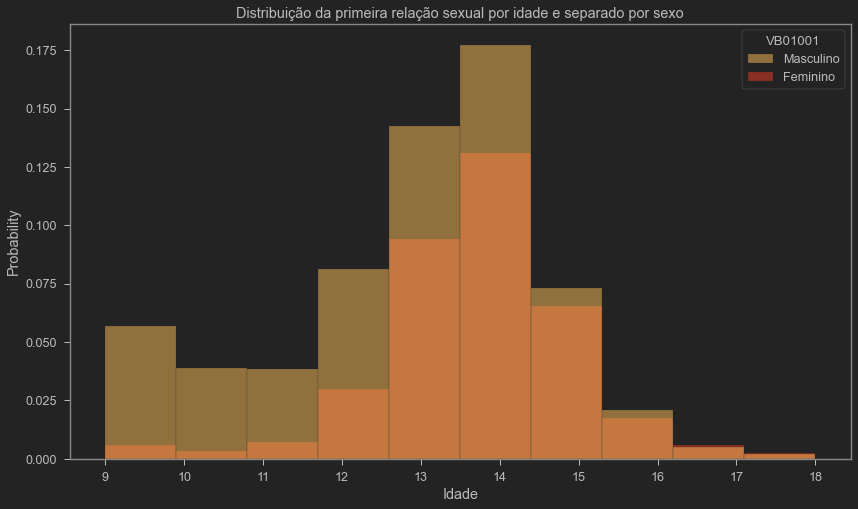

In [45]:
histplot_segregado_(dados[dados['VB08002']!=99][dados['VB08002']!=-1],'VB08002','VB01001','Distribuição da primeira relação sexual por idade e separado por sexo','Idade',sexo)

In [31]:
normaltest(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['VB01001']==1])

NormaltestResult(statistic=772.039477999991, pvalue=2.25817422785216e-168)

In [32]:
normaltest(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['VB01001']==2])

NormaltestResult(statistic=815.308331459041, pvalue=9.079152247299627e-178)

In [33]:
ranksums(dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['VB01001']==1], dados['VB08002'][dados['VB08002']!=99][dados['VB08002']!=-1][dados['VB01001']==2])

RanksumsResult(statistic=-36.73370726057936, pvalue=2.116475105856769e-295)

Mais uma vez temos amostras estatisticamente diferentes entre os alunos do sexo masculino e feminino.

## Há uma tendencia maior no consumo de bebidas alcoolicas entre os meninos?  E será que no interior os estudantes bebem mais? 

In [91]:
crosstab_rename(dados['VB05004'][dados['VB05004']!=-1][dados['VB05004']!=99],consumo_30_dias,dados['VB01001'],sexo, 'Quantidade de dias em que houve consumo de alcool nos ultimos 30 dias:')

,Masculino,Feminino
Quantidade de dias em que houve consumo de alcool nos ultimos 30 dias:,,
Nenhum dia nos últimos 30 dias,60.12,57.75
1 ou 2 dias nos últimos 30 dias,23.21,26.76
3 a 5 dias nos últimos 30 dias,7.08,7.13
6 a 9 dias nos últimos 30 dias,4.20,3.74
10 a 19 dias nos últimos 30 dias,2.96,2.48
20 a 29 dias nos últimos 30 dias,1.23,1.39
Todos os dias nos últimos 30 dias,1.20,0.77


Como a maioria,de ambos os sexos, respondeu que não houve consumo de alcool nos ultimos 30 dias, podemos excluir essa resposta e trabalhar somente com  a população que consumiu.

In [92]:
crosstab_rename(dados['VB05004'][dados['VB05004']>1][dados['VB05004']!=99],consumo_30_dias,dados['VB01001'],sexo, 'Quantidade de dias em que houve consumo de alcool nos ultimos 30 dias:')

,Masculino,Feminino
Quantidade de dias em que houve consumo de alcool nos ultimos 30 dias:,,
1 ou 2 dias nos últimos 30 dias,58.20,63.32
3 a 5 dias nos últimos 30 dias,17.76,16.87
6 a 9 dias nos últimos 30 dias,10.54,8.85
10 a 19 dias nos últimos 30 dias,7.41,5.86
20 a 29 dias nos últimos 30 dias,3.09,3.29
Todos os dias nos últimos 30 dias,3.00,1.81


C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


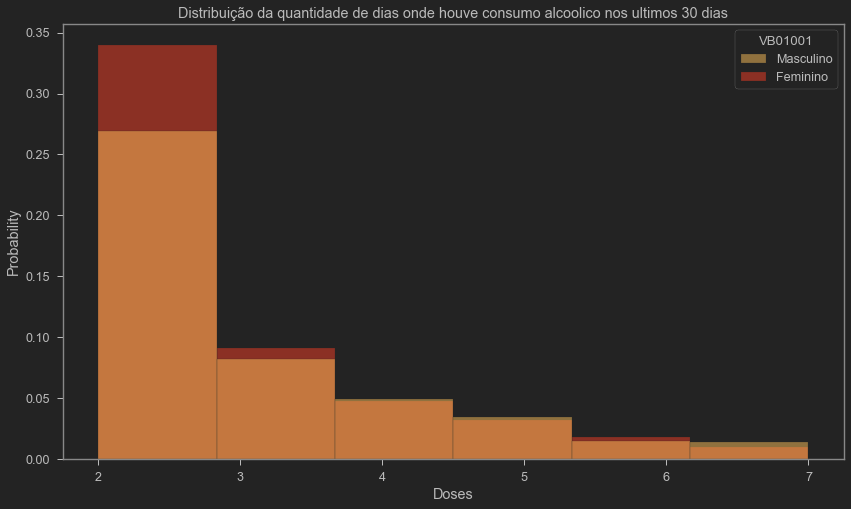

In [36]:
histplot_segregado_(dados[dados['VB05004']>1][dados['VB05004']!=99],'VB05004','VB01001','Distribuição da quantidade de dias onde houve consumo alcoolico nos ultimos 30 dias','Doses',sexo)

Aparentemente as mulheres tem um consumo menor que os homens, com pequena diferença nas distribuições.


Podemos então aplicar o teste estatistico de Wilcoxon

In [37]:
ranksums(dados['VB05004'][dados['VB05004']!=99][dados['VB05004']>1][dados['VB01001']==1], dados['VB05004'][dados['VB05004']!=99][dados['VB05004']>1][dados['VB01001']==2])

RanksumsResult(statistic=7.423455276000941, pvalue=1.1410370978878762e-13)

Como resultado do teste sabemos que são grupos estatisticamente distintos.

Veremos então se o consumo de alcool entre os estudantes é maior no interior.

In [93]:
crosstab_rename(dados['VB05004'][dados['VB05004']>1][dados['VB05004']!=99],consumo_30_dias,dados['TIPO_MUNIC'],tipo_municipio, 'Quantidade de dias em que houve consumo de alcool nos ultimos 30 dias:')

,Capital,Interior
Quantidade de dias em que houve consumo de alcool nos ultimos 30 dias:,,
1 ou 2 dias nos últimos 30 dias,59.42,62.41
3 a 5 dias nos últimos 30 dias,18.09,16.52
6 a 9 dias nos últimos 30 dias,10.42,8.88
10 a 19 dias nos últimos 30 dias,6.67,6.50
20 a 29 dias nos últimos 30 dias,3.17,3.22
Todos os dias nos últimos 30 dias,2.24,2.48


C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


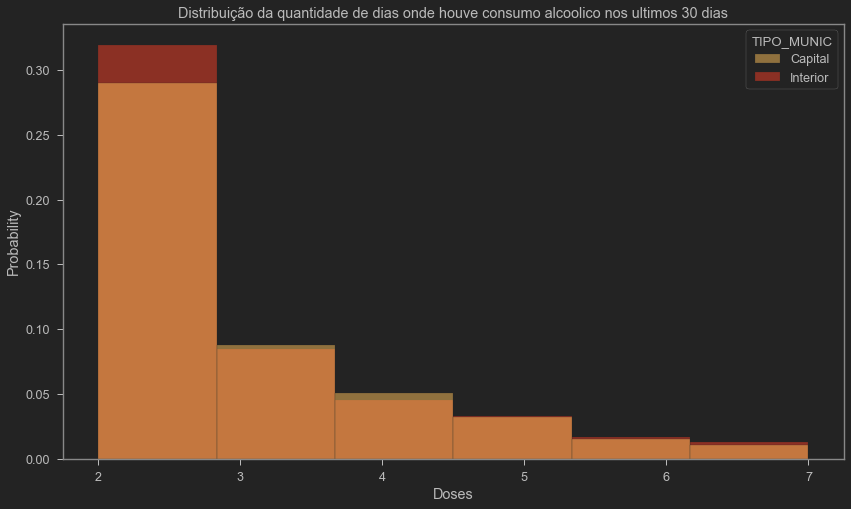

In [39]:
histplot_segregado_(dados[dados['VB05004']>1][dados['VB05004']!=99],'VB05004','TIPO_MUNIC','Distribuição da quantidade de dias onde houve consumo alcoolico nos ultimos 30 dias','Doses',tipo_municipio)

Pelo visto é ao contrario, o consumo na capital aparenta ser levemente superior  
Aplicando o teste estatistico de Wilcoxon

In [40]:
ranksums(dados['VB05004'][dados['VB05004']!=99][dados['VB05004']>1][dados['TIPO_MUNIC']==1], dados['VB05004'][dados['VB05004']!=99][dados['VB05004']>1][dados['TIPO_MUNIC']==2])

RanksumsResult(statistic=3.4607276342595936, pvalue=0.0005387175586287794)

Os grupos são distintos

### Um iniciação sexual cedo( < 14 anos) tem relação com o uso cedo de drogas? 

In [55]:
dados[dados["VB08002"]<=14][dados['VB08002']!=-1]

1         12
5         10
7         12
12        14
21        11
          ..
102054    11
102059    12
102064    14
102070    14
102071    14
Name: VB08002, Length: 22869, dtype: int64

In [53]:
dados[dados['VB06002']<=14][dados['VB06002']!=-1]

C:\Users\r9kx\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,...,VB16001A05,VB16001A06,VB16001A07,VB16001A08,ESTRATO_EXP,ESTRATOGEOREG,PESO,aluno,escola,turma
5,2015,76,1,11,1100205,1,1,1,4,17,...,2,2,1,2,110020521,1100205,3.738463,6,1,1787
21,2015,76,1,11,1100205,1,1,1,2,14,...,2,2,1,2,110020521,1100205,3.738463,22,2,2208
36,2015,76,1,11,1100205,1,1,2,4,14,...,1,2,2,2,110020521,1100205,3.738463,37,2,2208
67,2015,76,1,11,1100205,1,1,1,4,14,...,2,1,2,2,110020512,1100205,3.261531,68,3,1784
74,2015,76,1,11,1100205,1,1,2,4,14,...,2,2,2,2,110020512,1100205,3.207547,75,3,1785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102041,2015,76,5,53,5300108,1,1,1,5,14,...,1,2,1,2,530010821,5300108,16.873376,102042,3040,1883
102052,2015,76,5,53,5300108,1,1,1,2,14,...,2,2,2,2,530010821,5300108,16.873376,102053,3040,1883
102054,2015,76,5,53,5300108,1,1,1,1,15,...,2,2,2,2,530010821,5300108,16.873376,102055,3040,1883
102059,2015,76,5,53,5300108,1,1,2,5,13,...,2,2,1,2,530010821,5300108,16.873376,102060,3040,1883


In [72]:
crosstab_rename(dados["VB08002"][dados["VB08002"]<=14][dados['VB08002']!=-1],idade_iniciacao_sexual,dados['VB06002'][dados['VB06002']>=7][dados['VB06002']!=99],idade_consumo_drogas,'Idade sexual vs idade consumo de drogas')

,7 anos ou menos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos,16 anos,17 anos,18 anos ou mais
Idade sexual vs idade consumo de drogas,,,,,,,,,,,,
9 anos ou menos,50.77,34.48,26.47,15.33,8.98,7.94,5.57,5.35,6.65,9.88,5.88,0.0
10 anos,10.00,6.90,8.82,15.33,10.18,6.35,3.69,2.91,4.02,4.07,5.88,37.5
11 anos,2.31,17.24,2.94,11.68,20.36,8.11,5.50,3.84,4.17,9.30,15.69,12.5
12 anos,10.00,17.24,20.59,21.17,20.96,25.57,16.20,10.93,12.98,14.53,11.76,25.0
13 anos,12.31,10.34,14.71,23.36,25.75,33.33,40.93,28.02,24.27,22.67,23.53,12.5
14 anos,14.62,13.79,26.47,13.14,13.77,18.69,28.13,48.95,47.91,39.53,37.25,12.5


In [79]:
data = crosstab_rename_index(dados["VB08002"][dados["VB08002"]<=18][dados['VB08002']!=-1],idade_iniciacao_sexual,dados['VB06002'][dados['VB06002']>=7][dados['VB06002']!=99],idade_consumo_drogas,'Idade sexual vs idade consumo de drogas')

<AxesSubplot:ylabel='Idade sexual vs idade consumo de drogas'>

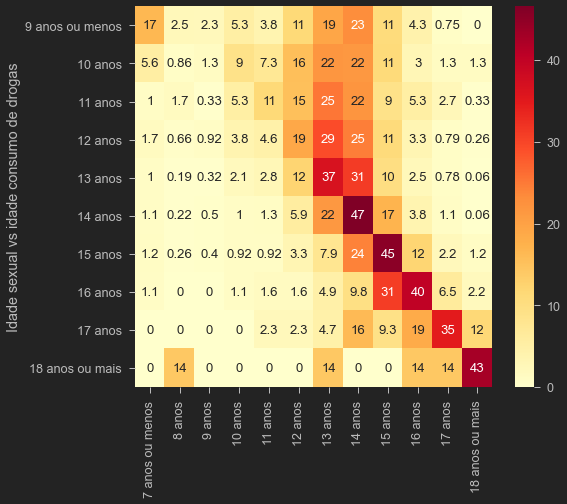

In [117]:
sns.heatmap(data=data,cmap='YlOrRd',annot=True)

### O consumo de cigarro está associado ao alcool e/ou outras drogas?

In [ ]:
VB04003 consumo_30_dias

In [105]:
crosstab_rename_index(dados['VB04003'][dados['VB04003']>1][dados['VB04003']!=99],consumo_30_dias,dados['VB05004'][dados['VB05004']>1][dados['VB05004']!=99],consumo_30_dias,'Consumo Cigarro vs consumo alcool')

,1 ou 2 dias nos últimos 30 dias,3 a 5 dias nos últimos 30 dias,6 a 9 dias nos últimos 30 dias,10 a 19 dias nos últimos 30 dias,20 a 29 dias nos últimos 30 dias,Todos os dias nos últimos 30 dias
Consumo Cigarro vs consumo alcool,,,,,,
1 ou 2 dias nos últimos 30 dias,51.45,20.47,13.95,8.42,3.19,2.52
3 a 5 dias nos últimos 30 dias,30.53,27.96,19.83,11.98,5.28,4.42
6 a 9 dias nos últimos 30 dias,20.36,21.91,21.91,21.91,7.73,6.19
10 a 19 dias nos últimos 30 dias,23.57,16.88,16.88,26.11,11.15,5.41
20 a 29 dias nos últimos 30 dias,22.99,17.65,17.65,20.86,14.44,6.42
Todos os dias nos últimos 30 dias,25.45,12.53,13.54,14.75,5.86,27.88


<AxesSubplot:ylabel='Consumo Cigarro vs consumo Alcool'>

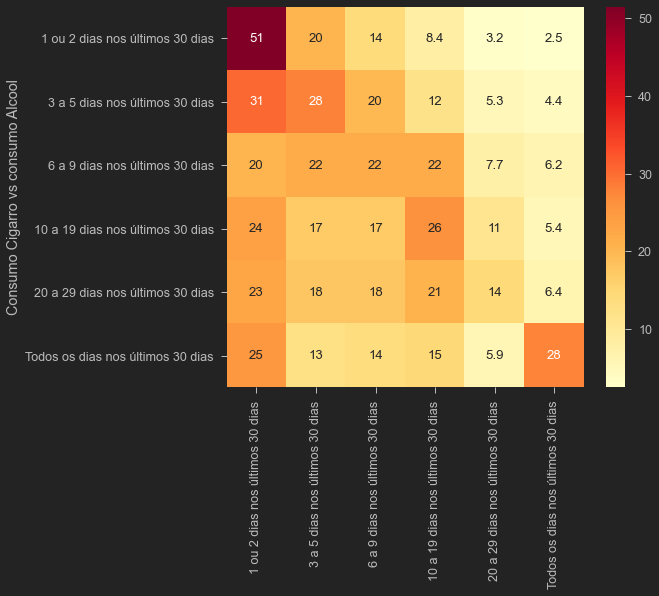

In [116]:
sns.heatmap(data=crosstab_rename_index(dados['VB04003'][dados['VB04003']>1][dados['VB04003']!=99],consumo_30_dias,dados['VB05004'][dados['VB05004']>1][dados['VB05004']!=99],consumo_30_dias,'Consumo Cigarro vs consumo Alcool'),cmap='YlOrRd',annot=True)

In [104]:
crosstab_rename_index(dados['VB04003'][dados['VB04003']>1][dados['VB04003']!=99],consumo_30_dias,dados['VB06003A'][dados['VB06003A']>1][dados['VB06003A']!=99],consumo_30_dias,'Consumo Cigarro vs consumo drogas')

,1 ou 2 dias nos últimos 30 dias,3 a 5 dias nos últimos 30 dias,6 a 9 dias nos últimos 30 dias,10 a 19 dias nos últimos 30 dias
Consumo Cigarro vs consumo drogas,,,,
1 ou 2 dias nos últimos 30 dias,65.63,18.26,5.85,10.26
3 a 5 dias nos últimos 30 dias,43.41,32.44,11.22,12.93
6 a 9 dias nos últimos 30 dias,34.24,24.90,20.23,20.62
10 a 19 dias nos últimos 30 dias,26.75,18.86,19.74,34.65
20 a 29 dias nos últimos 30 dias,20.29,15.94,12.32,51.45
Todos os dias nos últimos 30 dias,18.94,11.36,11.62,58.08


<AxesSubplot:ylabel='Consumo Cigarro vs consumo Alcool'>

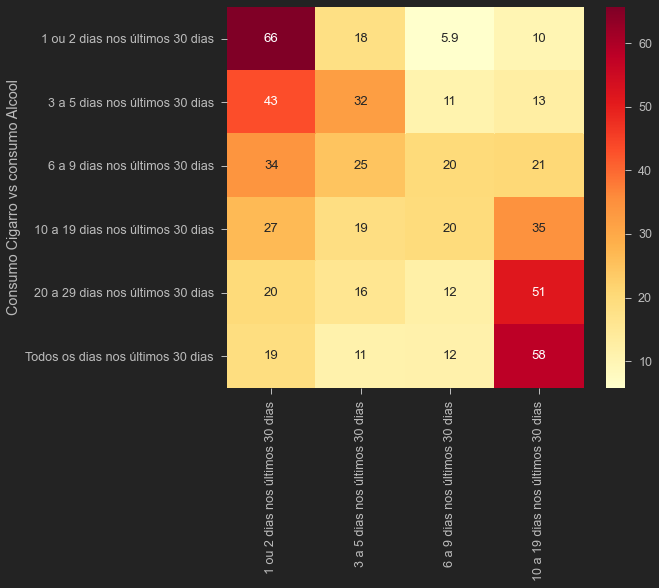

In [115]:
sns.heatmap(data=crosstab_rename_index(dados['VB04003'][dados['VB04003']>1][dados['VB04003']!=99],consumo_30_dias,dados['VB06003A'][dados['VB06003A']>1][dados['VB06003A']!=99],consumo_30_dias,'Consumo Cigarro vs consumo Alcool'),cmap='YlOrRd',annot=True)

In [109]:
ranksums(dados['VB04003'][dados['VB04003']>1][dados['VB04003']!=99],dados['VB05004'][dados['VB05004']>1][dados['VB05004']!=99])

RanksumsResult(statistic=13.285790573118328, pvalue=2.7988663453162813e-40)

In [107]:
ranksums(dados['VB04003'][dados['VB04003']>1][dados['VB04003']!=99],dados['VB06003A'][dados['VB06003A']>1][dados['VB06003A']!=99])

RanksumsResult(statistic=1.7349420005943297, pvalue=0.08275107882803547)